# Visualizing Loans Awarded by Kiva

In this project I visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

The project is part of the <a href = 'https://www.codecademy.com/learn' target = '_blank'>Codecademy</a> Data Science Career Path. There is a bit of guidance provided but a lot of the analysis is left to personal decision.

## Import Necessary Python Modules


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Load and Examine the Data

As a first step, I examine the raw CSV file on my local machine. Then, I load **kiva_data.csv** into a DataFrame called `df`. 

### Overview of the dataset:

In [2]:
df = pd.read_csv('kiva_data.csv')
df.head()

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female


Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 

### Relationship between the different columns

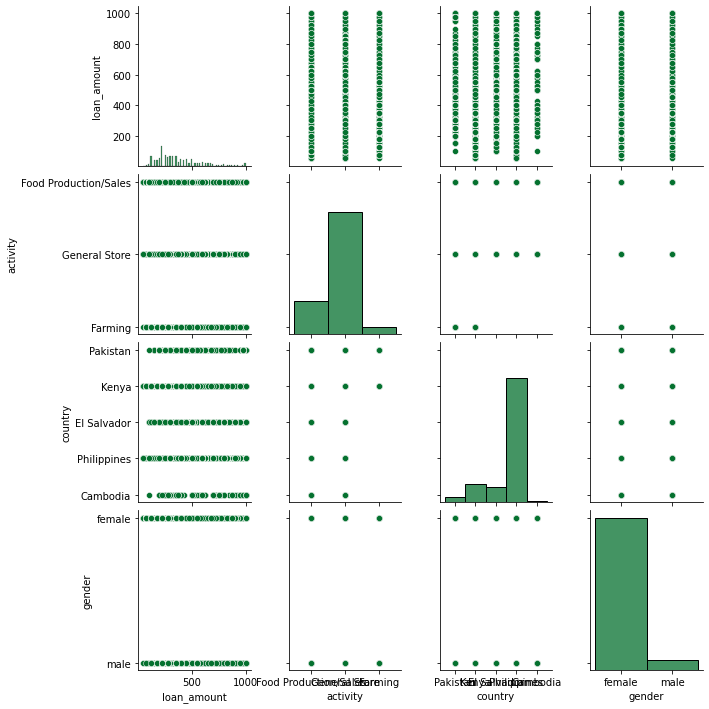

In [3]:
sns.set_palette("BuGn_r")
sns.pairplot(df, vars = ['loan_amount', 'activity', 'country', 'gender'])

## More Charts

I create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

Firstly, I set up the figure I'll use to plot the bar plot on. The `f` variable gives access to the figure and `ax` gives access to the axes.

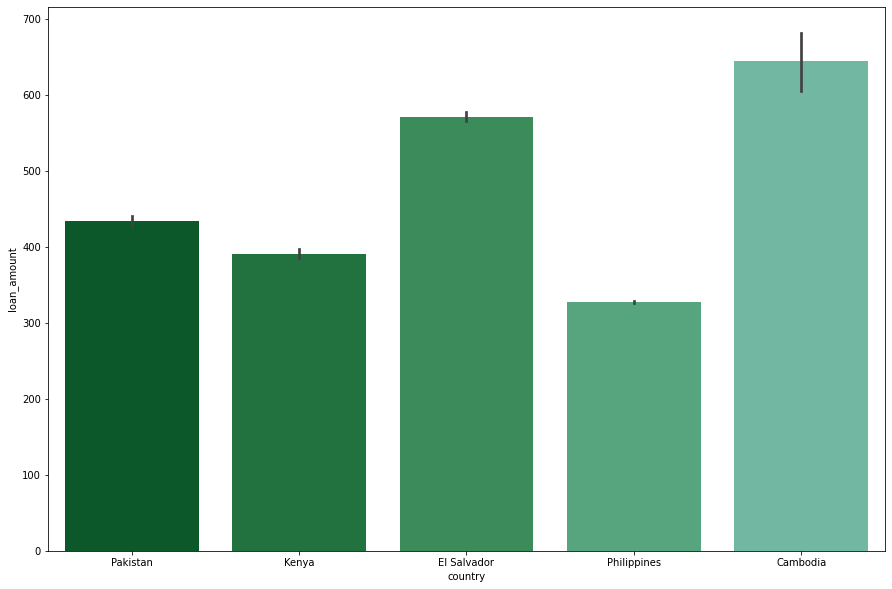

In [4]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))
sns.set_palette("BuGn_r", 9)

sns.barplot(data = df, x = 'country', y = 'loan_amount')
plt.show()

### Customizing the chart

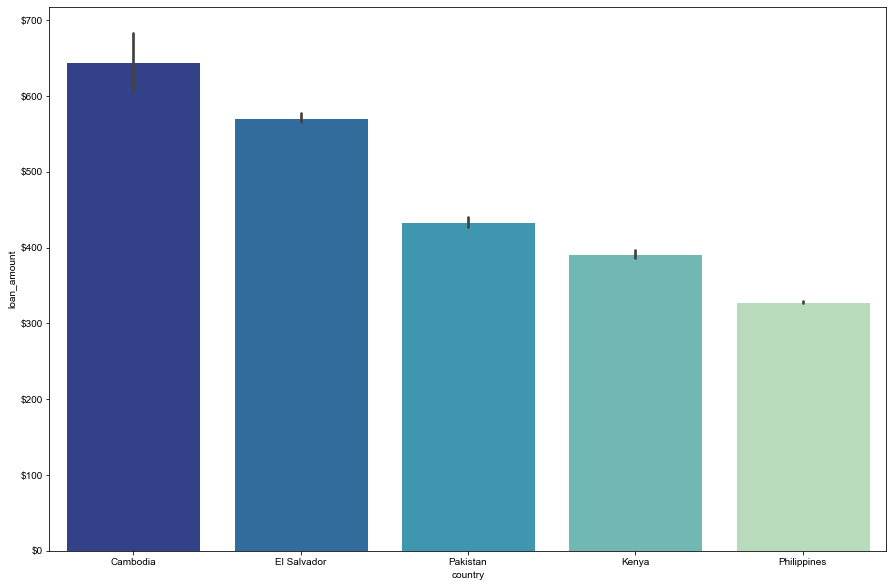

In [5]:
import matplotlib.ticker as mtick

# Creates the figure
f, ax = plt.subplots(figsize=(15, 10))

# Set style
sns.set_palette("YlGnBu_r")
sns.set_style('whitegrid')

# Plot the data

c_order = ['Cambodia', 'El Salvador', 'Pakistan', 'Kenya', 'Philippines']
sns.barplot(data = df, x = 'country', y = 'loan_amount', order = c_order)

# Use this code  to format the y-axis ticks

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)


## More Investigation

I dig a bit deeper by visualizing the loan amount by country, and nesting by gender (with the `hue` parameter)

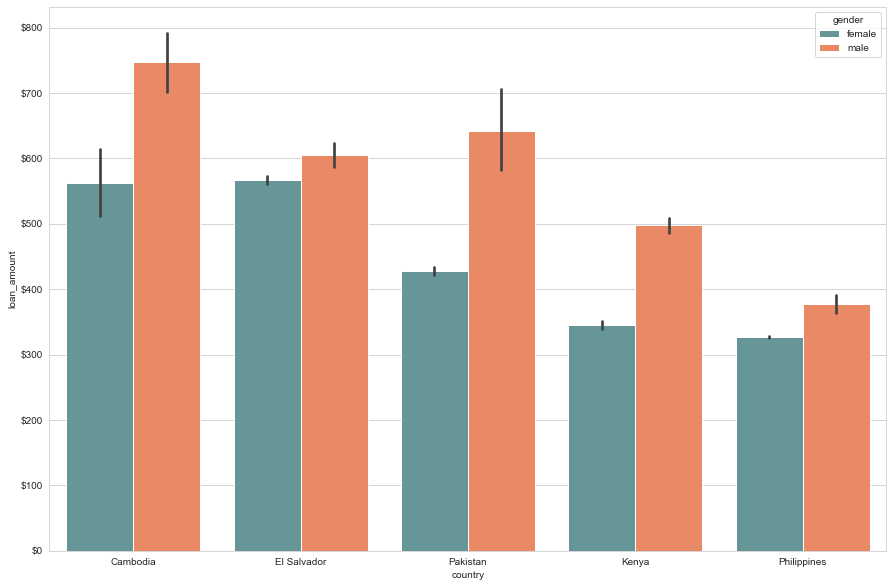

In [6]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 10))

# Set style
sns.set_style('whitegrid')

fm = ["#5F9EA0", "#FF7F50"]
sns.set_palette(fm)

sns.barplot(data=df, x="country", y="loan_amount", hue = "gender", order = c_order)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Apparently, there is a significant gender gap when it comes to the loan amounts.

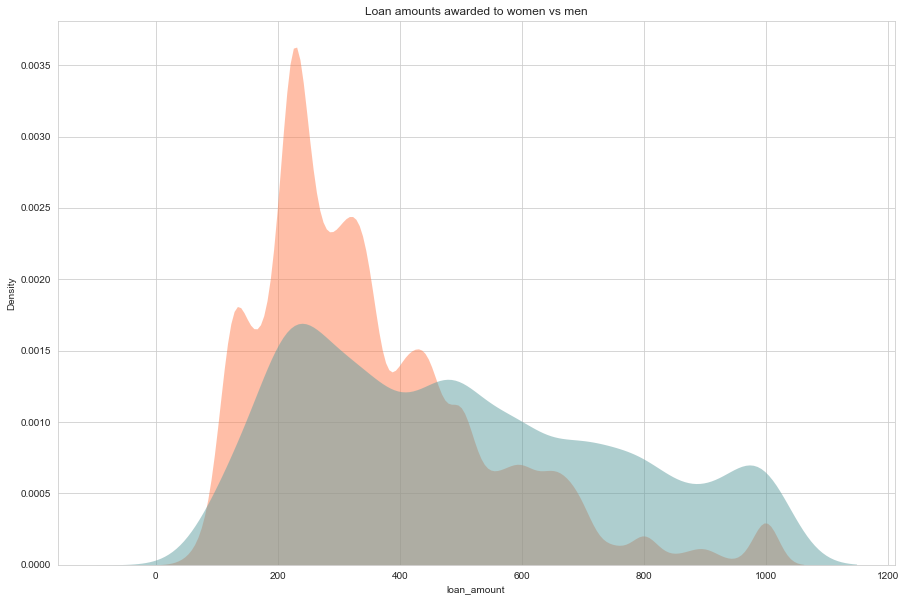

In [7]:
f, ax = plt.subplots(figsize=(15, 10))

sns.set_style('whitegrid')

m_loans = df.loan_amount[df.gender == 'male']
f_loans = df.loan_amount[df.gender == 'female']

sns.kdeplot(data=df, x=f_loans, fill=True, color="#FF7F50", alpha=.5, linewidth=0).set_title('Loan amounts awarded to women vs men')
sns.kdeplot(data=df, x=m_loans, fill=True, color="#5F9EA0", alpha=.5, linewidth=0)

plt.show()


We can see from the plot that women are much more likely to receive low loan amounts than men.

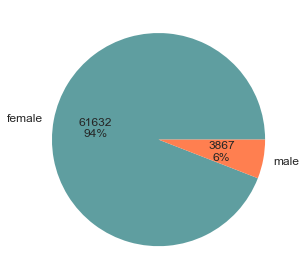

In [8]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('gender').size().plot(kind='pie', wedgeprops = {"edgecolor" : "none"}, autopct=label_function, textprops={'fontsize': 12}, colors=fm).set_ylabel('')

plt.tight_layout()
plt.show()

In [9]:
print('total loans awarded to men: ' + str(len(df.gender[df.gender == 'male'])) + ', \ntotal loans awarded to women: ' + str(len(df.gender[df.gender == 'female'] +'\n\n')))

total loans awarded to men: 3867, 
total loans awarded to women: 61632


Next, I want to get an impression about the amount of loans granted and how they are distributed betwenn men and women.

<AxesSubplot:xlabel='country', ylabel='loan_amount'>

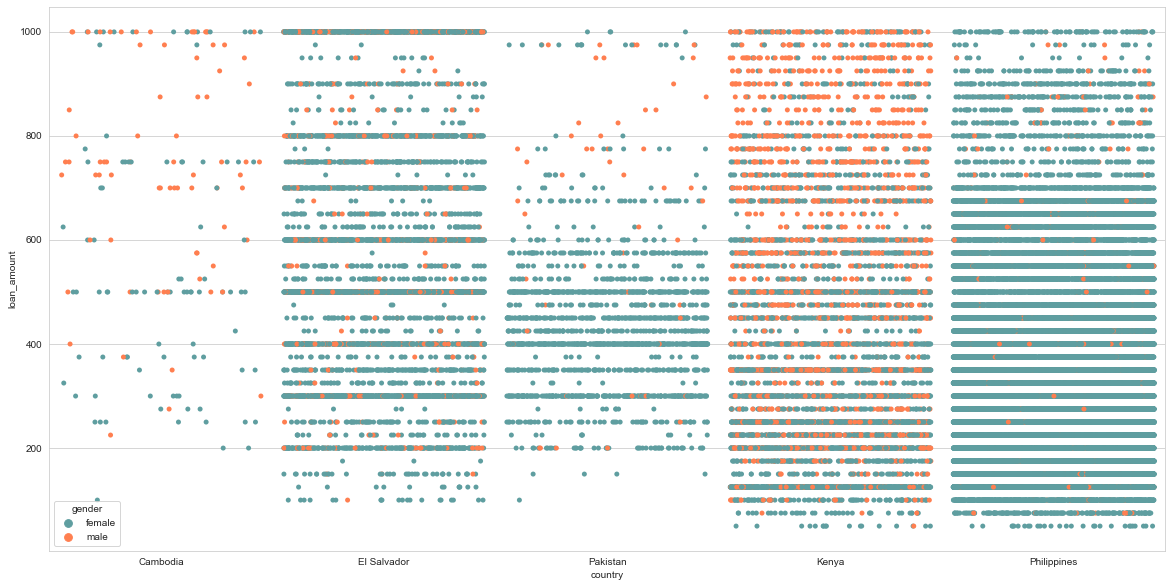

In [10]:
f, ax = plt.subplots(figsize=(20, 10))

# Set style
sns.set_style('whitegrid')
sns.set_palette(fm)

sns.stripplot(data=df, x="country", y="loan_amount", hue='gender', jitter=0.45, order=c_order)


It looks like in Cambodia and Kenya, men are about as likely as women to be awarded a loan. Comparatively few loans are awarded in Cambodia. People in the Philippines seem to be most frequently awarded with a Kiva-loan, and most of the recipients are women.

### Distribution of Activites and Countries

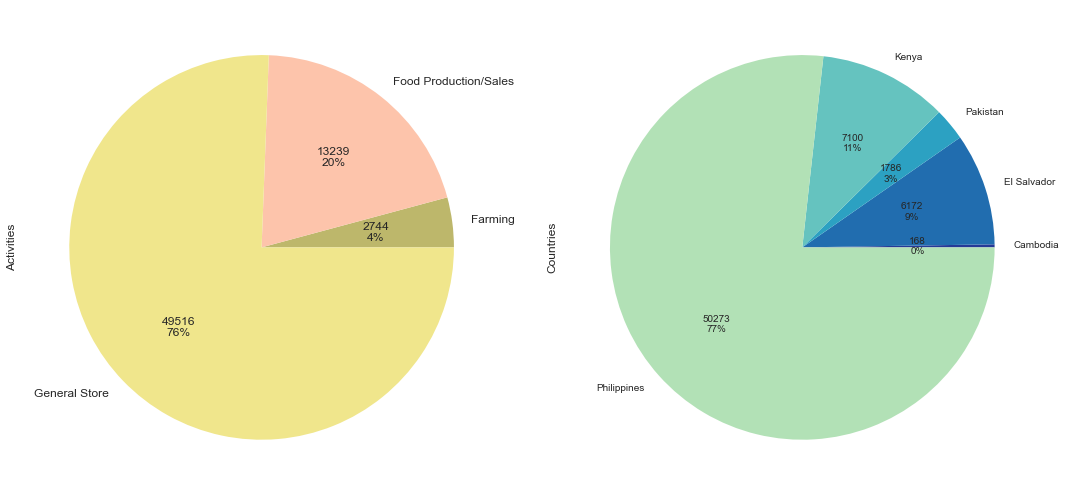

In [11]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

activity_colors = ['#BDB76B', '#FDC4AB', '#F0E68C']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
df.groupby('activity').size().plot(kind='pie', wedgeprops = {"edgecolor" : "none"}, autopct=label_function, textprops={'fontsize': 12},
                                  colors=activity_colors, ax=ax1)
sns.set_palette("YlGnBu_r")

df['country'].value_counts(normalize=True).reindex(c_order).plot.pie(autopct=label_function, wedgeprops = {"edgecolor" : "none"}, ax=ax2)

ax1.set_ylabel('Activities', size=12)
ax2.set_ylabel('Countries', size=12)
plt.tight_layout()


<AxesSubplot:title={'center':'Loans by Production Branch'}, xlabel='activity', ylabel='loan_amount'>

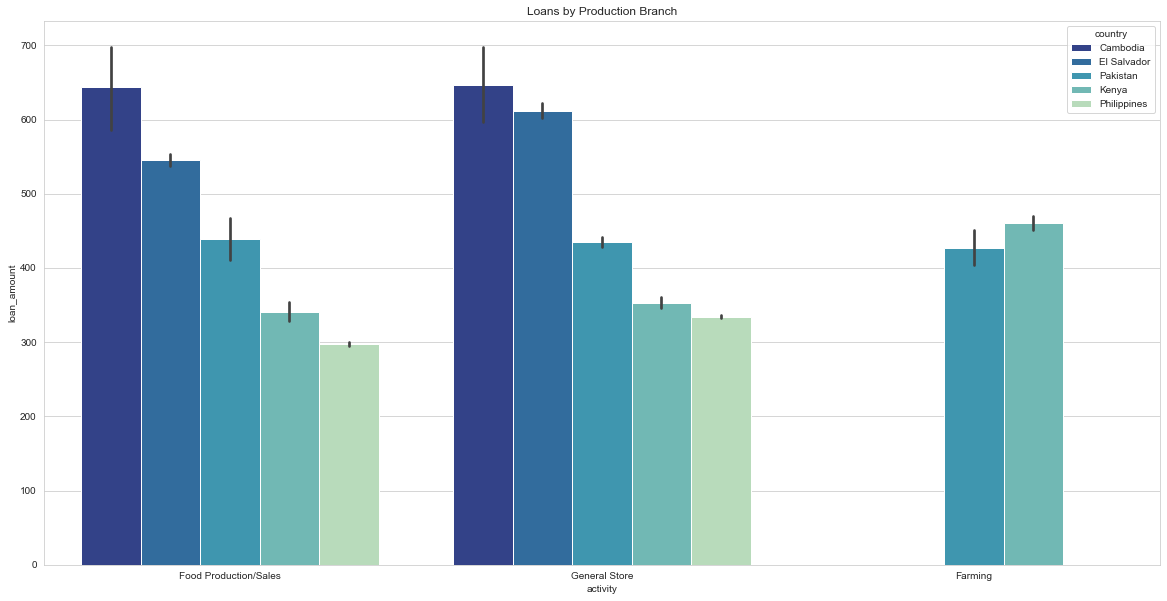

In [12]:
# Set style
sns.set_palette("YlGnBu_r")
sns.set_style('whitegrid')

# Create figure and axes 
f, ax = plt.subplots(figsize=(20, 10))

# Add a title
plt.title('Loans by Production Branch')

# Use Seaborn to create the bar plot
sns.barplot(data = df, x = 'activity', y = 'loan_amount', hue = 'country', hue_order = c_order)


## Box Plots 

### Loan amount distribution



<AxesSubplot:xlabel='country', ylabel='loan_amount'>

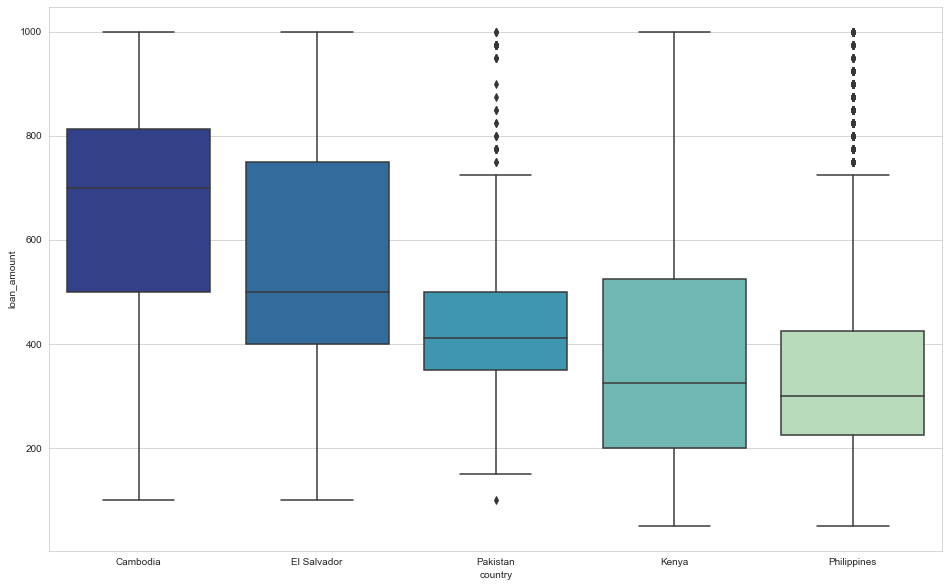

In [13]:
plt.figure(figsize=(16, 10))

# Set style
sns.set_palette("YlGnBu_r")
sns.set_style('whitegrid')

sns.boxplot(data = df, x = 'country', y = 'loan_amount', order = c_order)

### Activity

<AxesSubplot:xlabel='activity', ylabel='loan_amount'>

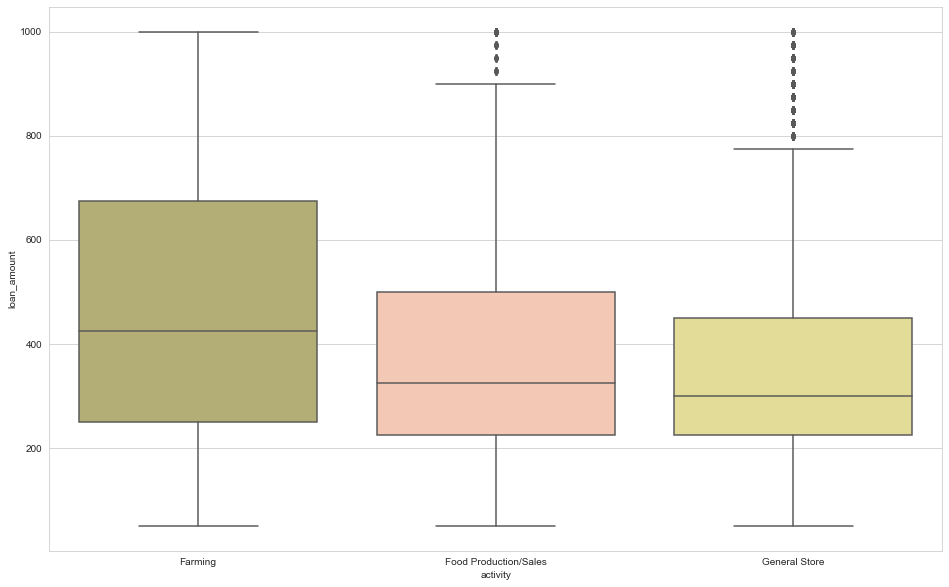

In [14]:
plt.figure(figsize=(16, 10))

# Set style
sns.set_palette(activity_colors)
sns.set_style('whitegrid')

a_order = ['Farming', 'Food Production/Sales', 'General Store']

sns.boxplot(data = df, x = 'activity', y = 'loan_amount', order = a_order)



On average, bigger loans are awarded to *farming* than to other activies. This might be because the entry costs are generally higher for farming, like buying agricultural machines or patches of land.

Just for fun, I add a violin plot with the same data. This shows more detail about the exact distribution.

<AxesSubplot:xlabel='activity', ylabel='loan_amount'>

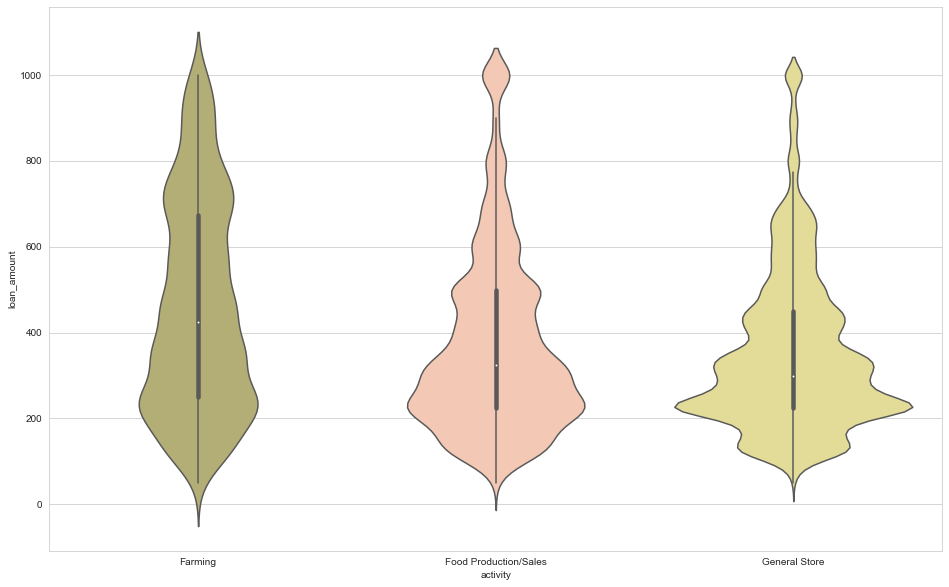

In [15]:
plt.figure(figsize=(16, 10))

# Set style
sns.set_palette(activity_colors)
sns.set_style('whitegrid')

a_order = ['Farming', 'Food Production/Sales', 'General Store']

sns.violinplot(data = df, x = 'activity', y = 'loan_amount', order = a_order)


## Putting it all together

I create three split violin plots to see in which country the gender gap is highest and what the distribution is for each activity

<AxesSubplot:title={'center':'Distribution of loan amounts for Farming (only two countries received funding)'}, xlabel='country', ylabel='loan_amount'>

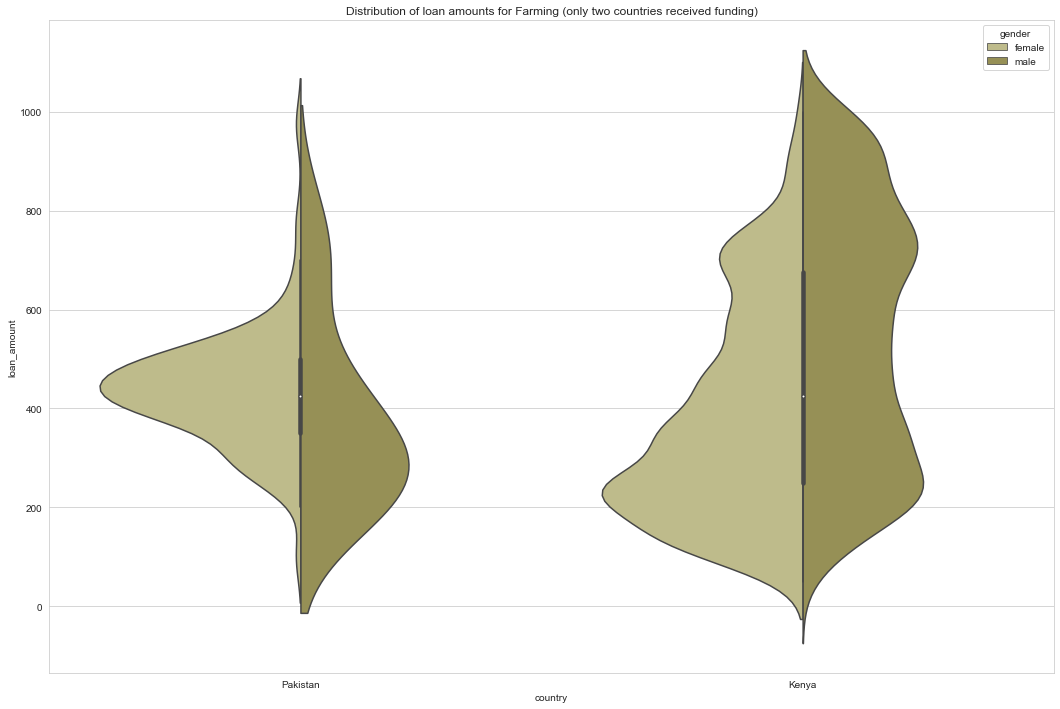

In [16]:
# Some styling (feel free to modify)
plt.figure(figsize=(18, 12))

sns.set_palette(['#C7C282', '#A1994B'])


# Add a title
plt.title('Distribution of loan amounts for Farming (only two countries received funding)')

sns.violinplot(data = df[df.activity == 'Farming'], x = 'country', y = 'loan_amount', hue='gender', split=True)

<AxesSubplot:title={'center':'Distribution of loan amounts for Food Production/Sales'}, xlabel='country', ylabel='loan_amount'>

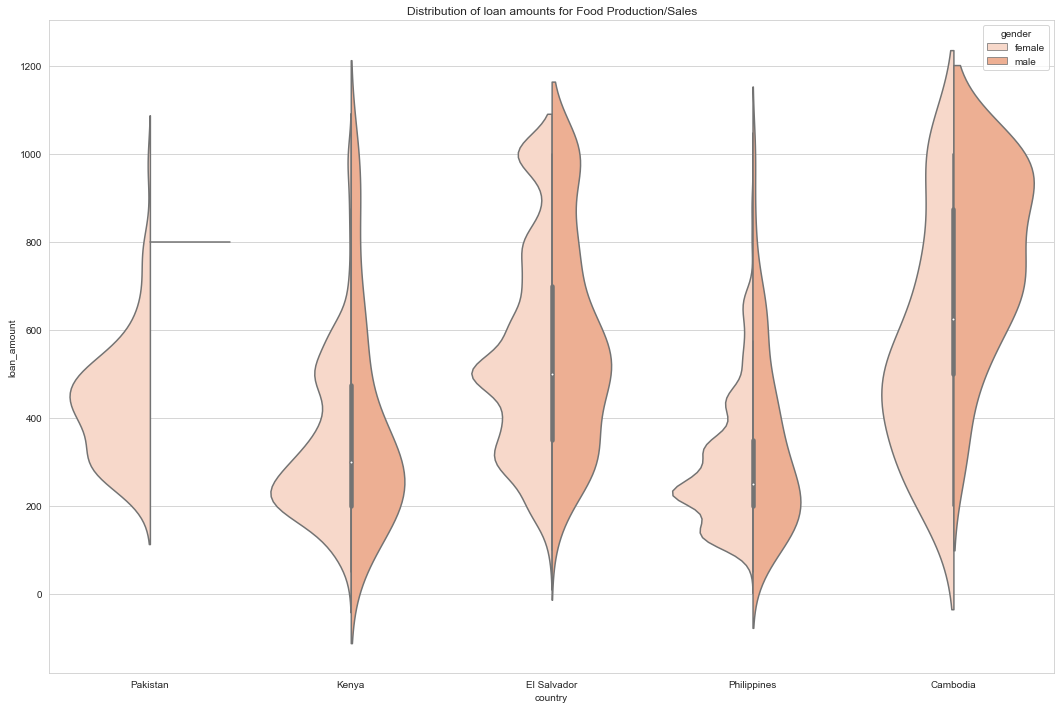

In [17]:
# Some styling (feel free to modify)
plt.figure(figsize=(18, 12))

sns.set_palette(['#FED5C3', '#FCA984'])

# Add a title
plt.title('Distribution of loan amounts for Food Production/Sales')

sns.violinplot(data = df[df.activity == 'Food Production/Sales'], x = 'country', y = 'loan_amount', hue='gender', split=True)

<AxesSubplot:title={'center':'Distribution of loan amounts for General Store'}, xlabel='country', ylabel='loan_amount'>

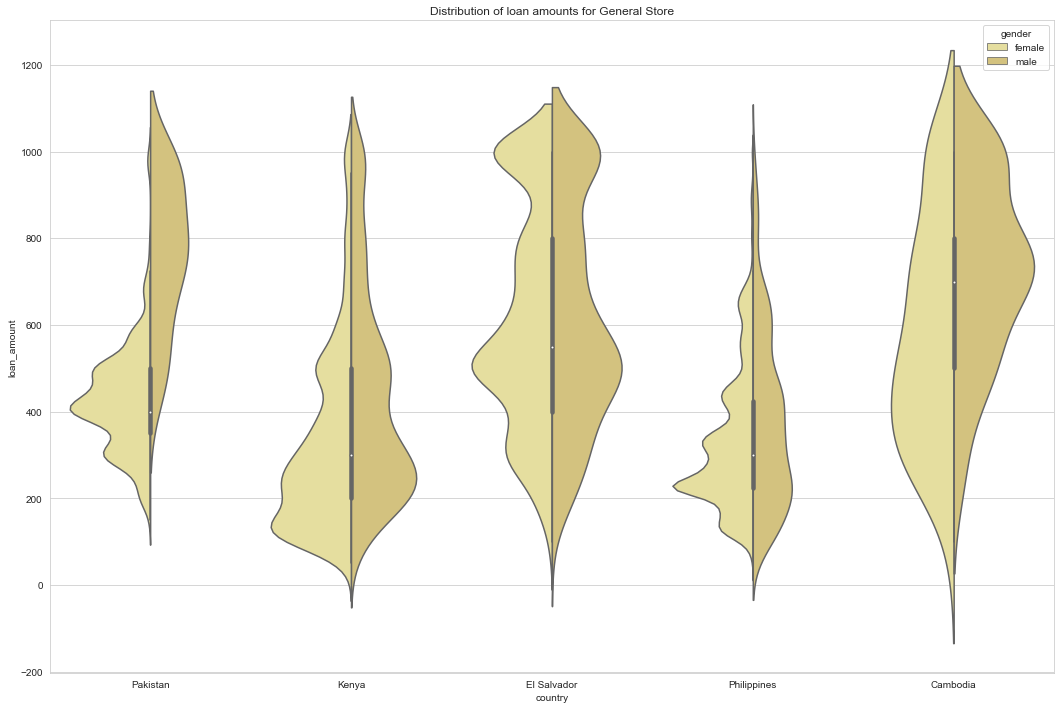

In [18]:
# Some styling (feel free to modify)
plt.figure(figsize=(18, 12))

sns.set_palette(['#F1E893', '#E1CA71'])

# Add a title
plt.title('Distribution of loan amounts for General Store')

sns.violinplot(data = df[df.activity == 'General Store'], x = 'country', y = 'loan_amount', hue='gender', split=True)

We can now clearly see that the gender pay gap is most significant in Pakistan and Cambodia while it is fairly equal in El Salvador. 

Pakistan is interesting because woman receive higher loans than men for Farming but much lower ones for General Stores and Food Production / Sales.